# Import packages and datasets

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sales_train_val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sales_train_validation.csv')

# Filter dataset because we only two-year training (too distant past observation and test data)

In [4]:
list_cols_drop = ['d_{0}'.format(i) for i in range(1, 1168)] + ['d_{0}'.format(i) for i in range(1900, 1914)]

In [5]:
sales_train_val = sales_train_val.drop(columns=list_cols_drop)

In [6]:
sales_train_val

,id,item_id,dept_id,cat_id,store_id,state_id,d_1168,d_1169,d_1170,d_1171,...,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,1,0,0,...,0,0,1,0,4,2,3,0,1,2
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,2,5,3,2,...,3,1,2,1,3,1,0,2,5,4
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,4,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,2,3,1,0,...,0,1,1,2,0,0,0,0,1,1
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,1,3,0,...,0,1,1,2,1,4,0,0,2,2
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,3,6,0,...,0,0,1,1,2,1,1,1,1,2


# Get sales data of Household in California stores

In [7]:
df_ca_household = sales_train_val[(sales_train_val['state_id'] == 'CA') & (sales_train_val['cat_id'] == 'HOUSEHOLD')]

In [8]:
df_ca_category = df_ca_household.copy()

df_ca_category.drop(['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], axis = 1, inplace=True)
df_ca_category = pd.melt(df_ca_category, id_vars=['id'])
df_ca_category['Date'] = df_ca_category['variable'].str[2:].astype('int')

dict_date = {}
for i in range(1, 1914):
    dict_date.update({i: (pd.to_datetime('28/01/2011', format='%d/%m/%Y') + pd.to_timedelta(i, unit='D'))})
    
df_ca_category['Date'] = df_ca_category['Date'].map(dict_date)

df_ca_category = df_ca_category[['Date', 'id', 'value']]

In [9]:
df_ca_category

,Date,id,value
0,2014-04-10,HOUSEHOLD_1_001_CA_1_validation,0
1,2014-04-10,HOUSEHOLD_1_002_CA_1_validation,0
2,2014-04-10,HOUSEHOLD_1_003_CA_1_validation,0
3,2014-04-10,HOUSEHOLD_1_004_CA_1_validation,0
4,2014-04-10,HOUSEHOLD_1_005_CA_1_validation,0
...,...,...,...
3065611,2016-04-10,HOUSEHOLD_2_512_CA_4_validation,1
3065612,2016-04-10,HOUSEHOLD_2_513_CA_4_validation,0
3065613,2016-04-10,HOUSEHOLD_2_514_CA_4_validation,1
3065614,2016-04-10,HOUSEHOLD_2_515_CA_4_validation,0


# Coefficient of Variance Squared (CV2)

In [10]:
df_ca_category_1 = df_ca_category[df_ca_category['value'] != 0]

In [11]:
cv_data = df_ca_category_1.groupby('id').agg(average=('value','mean'),
                                 sd=('value','std')).reset_index()

cv_data['cv_sqr'] = (cv_data['sd'] / cv_data['average'])**2

In [12]:
cv_data

,id,average,sd,cv_sqr
0,HOUSEHOLD_1_001_CA_1_validation,1.420091,0.681847,0.230537
1,HOUSEHOLD_1_001_CA_2_validation,1.535433,0.794777,0.267935
2,HOUSEHOLD_1_001_CA_3_validation,1.447368,0.770219,0.283185
3,HOUSEHOLD_1_001_CA_4_validation,1.362319,0.652947,0.229720
4,HOUSEHOLD_1_002_CA_1_validation,1.224638,0.512872,0.175389
...,...,...,...,...
4180,HOUSEHOLD_2_515_CA_4_validation,1.098361,0.351422,0.102369
4181,HOUSEHOLD_2_516_CA_1_validation,1.129252,0.410014,0.131830
4182,HOUSEHOLD_2_516_CA_2_validation,1.207692,0.460807,0.145588
4183,HOUSEHOLD_2_516_CA_3_validation,1.125000,0.386357,0.117943


# Average Demand Interval (ADI) per Product

In [13]:
prod_by_date = df_ca_category_1.groupby(['id','Date']).agg(count=('id','count')).reset_index()
skus = prod_by_date.id.value_counts()

In [14]:
from timeit import default_timer as timer
start = timer()

list_adi = list()
for i in range(len(skus.index)):
    a = prod_by_date[prod_by_date['id']==skus.index[i]]
    a['Previous_Date'] = a['Date'].shift(1)
    a['Duration'] = (a['Date'] - a['Previous_Date']).dt.days
    mean_temp = a.Duration.mean()
    list_adi.append([skus.index[i], mean_temp])

end = timer()
print('This line of code took {} minutes'.format((end-start) / 60))

This line of code took 6.039002834516666 minutes


In [15]:
list_adi[:5]

[['HOUSEHOLD_1_494_CA_3_validation', 1.0027434842249656],
 ['HOUSEHOLD_1_072_CA_3_validation', 1.013869625520111],
 ['HOUSEHOLD_1_409_CA_1_validation', 1.0166898470097356],
 ['HOUSEHOLD_1_409_CA_3_validation', 1.0166898470097356],
 ['HOUSEHOLD_1_459_CA_3_validation', 1.020949720670391]]

In [16]:
ADI_df = pd.DataFrame(list_adi, columns=['id', 'ADI'])

In [17]:
ADI_df

,id,ADI
0,HOUSEHOLD_1_494_CA_3_validation,1.002743
1,HOUSEHOLD_1_072_CA_3_validation,1.013870
2,HOUSEHOLD_1_409_CA_1_validation,1.016690
3,HOUSEHOLD_1_409_CA_3_validation,1.016690
4,HOUSEHOLD_1_459_CA_3_validation,1.020950
...,...,...
4180,HOUSEHOLD_1_432_CA_3_validation,3.500000
4181,HOUSEHOLD_1_537_CA_4_validation,3.000000
4182,HOUSEHOLD_2_162_CA_2_validation,3.000000
4183,HOUSEHOLD_1_356_CA_2_validation,NaN


# MERGE CV2 AND ADI DATA

In [18]:
adi_cv = pd.merge(cv_data, ADI_df, on = 'id', how = 'inner')

In [19]:
adi_cv

,id,average,sd,cv_sqr,ADI
0,HOUSEHOLD_1_001_CA_1_validation,1.420091,0.681847,0.230537,3.334862
1,HOUSEHOLD_1_001_CA_2_validation,1.535433,0.794777,0.267935,5.785714
2,HOUSEHOLD_1_001_CA_3_validation,1.447368,0.770219,0.283185,4.841060
3,HOUSEHOLD_1_001_CA_4_validation,1.362319,0.652947,0.229720,3.533981
4,HOUSEHOLD_1_002_CA_1_validation,1.224638,0.512872,0.175389,4.948905
...,...,...,...,...,...
4180,HOUSEHOLD_2_515_CA_4_validation,1.098361,0.351422,0.102369,12.000000
4181,HOUSEHOLD_2_516_CA_1_validation,1.129252,0.410014,0.131830,4.979452
4182,HOUSEHOLD_2_516_CA_2_validation,1.207692,0.460807,0.145588,5.527132
4183,HOUSEHOLD_2_516_CA_3_validation,1.125000,0.386357,0.117943,6.951456


In [20]:
adi_cv.isnull().sum()

id         0
average    0
sd         2
cv_sqr     2
ADI        2
dtype: int64

In [21]:
adi_cv.to_csv('ADI_CV_2_Year.csv')

In [22]:
def category(df):
    a=0

    if((df['ADI']<=1.32) & (df['cv_sqr']<=0.49)):
        a='Smooth'
    if((df['ADI']>=1.32) & (df['cv_sqr']>=0.49)):  
        a='Lumpy'
    if((df['ADI']<1.32) & (df['cv_sqr']>0.49)):
        a='Erratic'
    if((df['ADI']>1.32) & (df['cv_sqr']<0.49)):
        a='Intermittent'
    return a

In [23]:
adi_cv['category']=adi_cv.apply(category,axis=1)

In [24]:
adi_cv.dropna(inplace=True)

In [25]:
adi_cv

,id,average,sd,cv_sqr,ADI,category
0,HOUSEHOLD_1_001_CA_1_validation,1.420091,0.681847,0.230537,3.334862,Intermittent
1,HOUSEHOLD_1_001_CA_2_validation,1.535433,0.794777,0.267935,5.785714,Intermittent
2,HOUSEHOLD_1_001_CA_3_validation,1.447368,0.770219,0.283185,4.841060,Intermittent
3,HOUSEHOLD_1_001_CA_4_validation,1.362319,0.652947,0.229720,3.533981,Intermittent
4,HOUSEHOLD_1_002_CA_1_validation,1.224638,0.512872,0.175389,4.948905,Intermittent
...,...,...,...,...,...,...
4180,HOUSEHOLD_2_515_CA_4_validation,1.098361,0.351422,0.102369,12.000000,Intermittent
4181,HOUSEHOLD_2_516_CA_1_validation,1.129252,0.410014,0.131830,4.979452,Intermittent
4182,HOUSEHOLD_2_516_CA_2_validation,1.207692,0.460807,0.145588,5.527132,Intermittent
4183,HOUSEHOLD_2_516_CA_3_validation,1.125000,0.386357,0.117943,6.951456,Intermittent


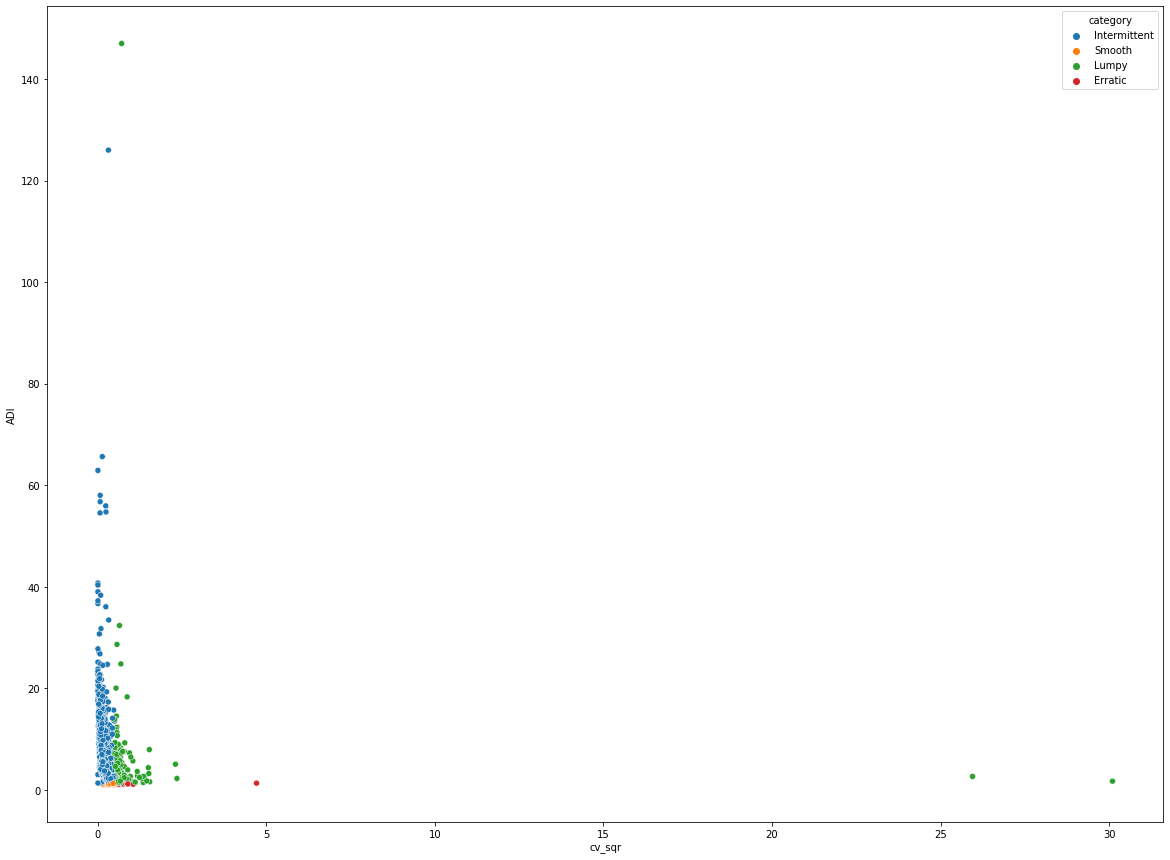

In [26]:
plt.figure(figsize=(20,15))
sns.scatterplot(x='cv_sqr',y='ADI',hue='category',data=adi_cv)

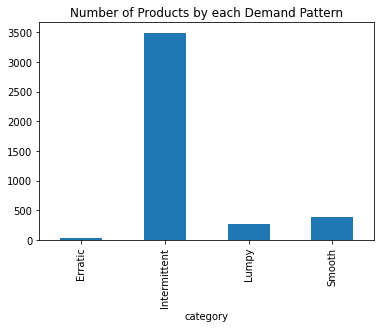

In [27]:
adi_cv.groupby('category')['id'].count().plot(kind='bar')
plt.title('Number of Products by each Demand Pattern')
plt.show()

In [28]:
list_intermittent = adi_cv[adi_cv['category'] == 'Intermittent']['id'].unique().tolist()
list_lumpy = adi_cv[adi_cv['category'] == 'Lumpy']['id'].unique().tolist()
list_smooth = adi_cv[adi_cv['category'] == 'Smooth']['id'].unique().tolist()
list_erratic = adi_cv[adi_cv['category'] == 'Erratic']['id'].unique().tolist()

In [29]:
pd.Series(list_intermittent).to_csv('Intermittent_ID_2_Year_Data.csv')
pd.Series(list_lumpy).to_csv('Lumpy_ID_2_Year_Data.csv')
pd.Series(list_smooth).to_csv('Smooth_ID_2_Year_Data.csv')
pd.Series(list_erratic).to_csv('Erratic_ID_2_Year_Data.csv')